## Importación de bibliotecas

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Opciones de graficación
Estética de las gráficas

In [138]:
sns.set_style("darkgrid")                  
sns.set_context("paper", font_scale = 2.4)  # Tamaño de fuente en el contexto de un "paper"

In [139]:
def graficar_simple(experimento, sentido):
    global t_pasos, promedio, error
    tiempo = t_pasos
    x_marcas = [1, 10, 20, 30, 40, 50, 60]
    etiqueta_tiempo = "$\\nu$"
    etiquetas_sentido = {"ab" : "$ \\mathrm{STE}_{A \\rightarrow B} $",
                         "ba" : "$ \\mathrm{STE}_{B \\rightarrow A} $",
                         "cd" : "$ \\mathrm{STE}_{C \\rightarrow D} $",
                         "dc" : "$ \\mathrm{STE}_{D \\rightarrow C} $"}
    etiquetas_exp = {"fourier" : "Fourier", "cattaneo" : "MCV", "guyer" : "JGK"}
    plt.figure(figsize = (10, 6))
    plt.plot(tiempo, promedio[experimento][sentido], "o--")
    plt.title(f"Experiment: {etiquetas_exp[experimento]}")
    plt.xlim(tiempo.min(), tiempo.max())
    plt.xticks(x_marcas)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText = True)
    plt.xlabel(etiqueta_tiempo)
    plt.ylabel(etiquetas_sentido[sentido])
    plt.savefig("graficas/entropia_modelos/" + experimento + "_" + sentido + ".pdf", bbox_inches = "tight")
    plt.show()

In [140]:
def graficar_diferencia(experimento, diferencia, por_pasos = True):
    global t_pasos, promedio_diferencias
    tiempo = t_pasos
    x_marcas = [1, 10, 20, 30, 40, 50, 60]
    etiqueta_tiempo = "$\\nu$"
    etiquetas_sentido = {"ab-ba" : "$ \\mathrm{STE}_{A \\rightarrow B} - \\mathrm{STE}_{B \\rightarrow A} $",
                         "ba-ab" : "$ \\mathrm{STE}_{B \\rightarrow A} - \\mathrm{STE}_{A \\rightarrow B} $",
                         "cd-dc" : "$ \\mathrm{STE}_{C \\rightarrow D} - \\mathrm{STE}_{D \\rightarrow C} $",
                         "dc-cd" : "$ \\mathrm{STE}_{D \\rightarrow C} - \\mathrm{STE}_{C \\rightarrow D} $"}
    etiquetas_exp = {"fourier" : "Fourier", "cattaneo" : "MCV", "guyer" : "JGK"}
    plt.figure(figsize = (10, 6))
    plt.plot(tiempo, promedio_diferencias[experimento][diferencia], "o--")
    plt.title(f"Experiment: {etiquetas_exp[experimento]}")
    plt.xlim(tiempo.min(), tiempo.max())
    plt.xticks(x_marcas)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText = True)
    plt.xlabel(etiqueta_tiempo)
    plt.ylabel(etiquetas_sentido[diferencia])
    plt.savefig("graficas/entropia_modelos/" + experimento + "_" + diferencia + ".pdf", bbox_inches = "tight")
    plt.show()

## Ruta de archivos

In [141]:
ruta = "datos/caracter_entropia_modelos/"

## Tiempo

In [142]:
t = np.loadtxt("datos/base/tiempo_ets.csv")[: 60]
t_pasos = np.loadtxt("datos/base/pasos_ets.csv")[: 60]

## Inicialización de "metadatos"

In [143]:
sentidos = ["ab", "ba", "cd", "dc"]
diferencias = ["ab-ba", "ba-ab", "cd-dc", "dc-cd"]
experimentos = ["fourier", "cattaneo", "guyer"]

## Inicialización de diccionarios

In [144]:
promedio = {}
promedio_diferencias = {}

## Lectura y organización de datos respecto a sus "metadatos"

In [145]:
for ex in experimentos:
    promedio[ex] = {}
    for sen in sentidos:
        promedio[ex][sen] = np.loadtxt(ruta + "promedio_" + ex + "_" + sen + ".csv")
    
    promedio_diferencias[ex] = {}
    for dif in diferencias:
        promedio_diferencias[ex][dif] = np.loadtxt(ruta + "promedio_" + ex + "_" + dif + ".csv")

## Proceso de graficación

Experimento:  fourier
Sentido:  ab


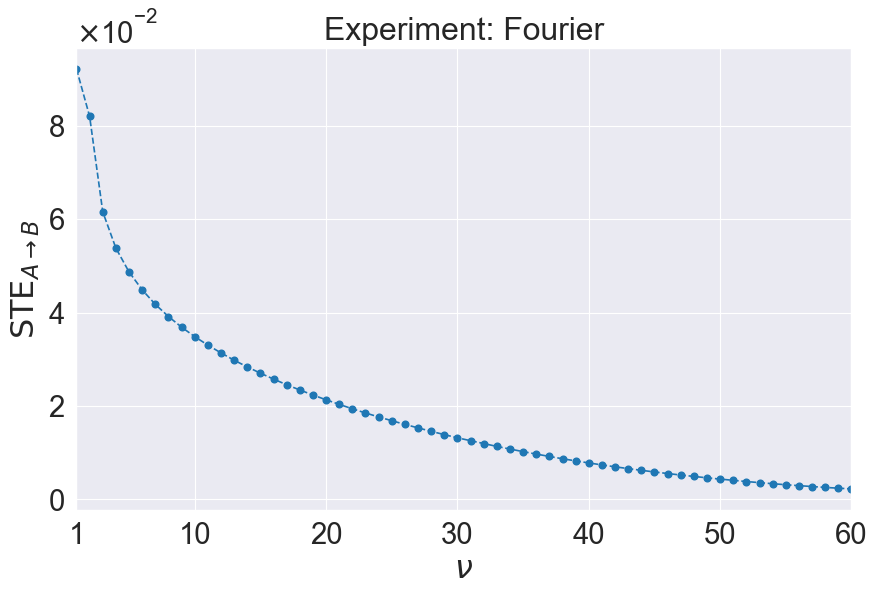

Experimento:  fourier
Sentido:  ba


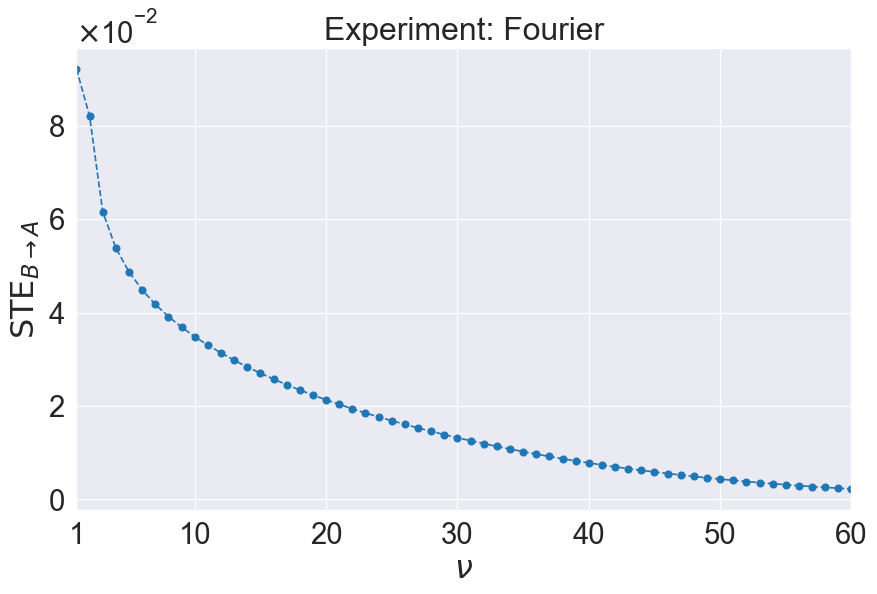

Experimento:  fourier
Sentido:  cd


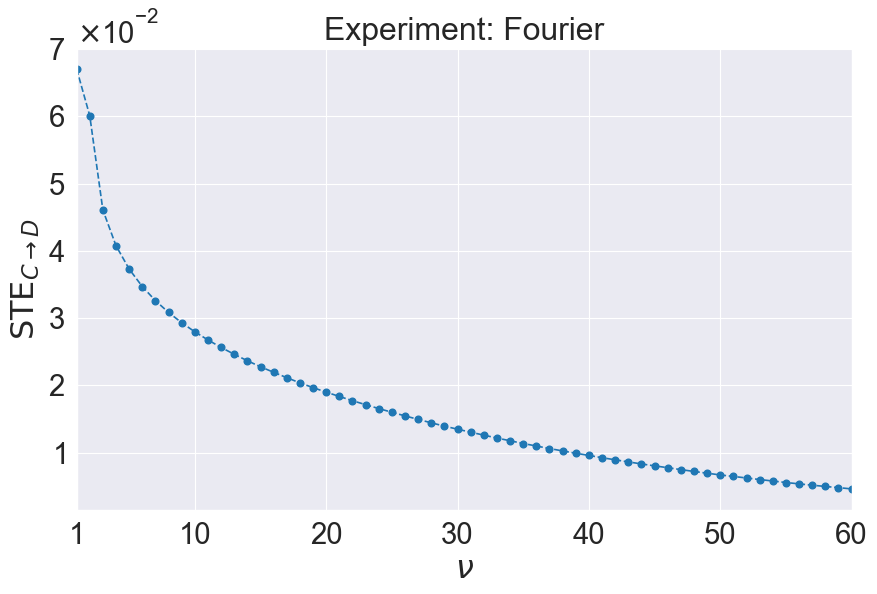

Experimento:  fourier
Sentido:  dc


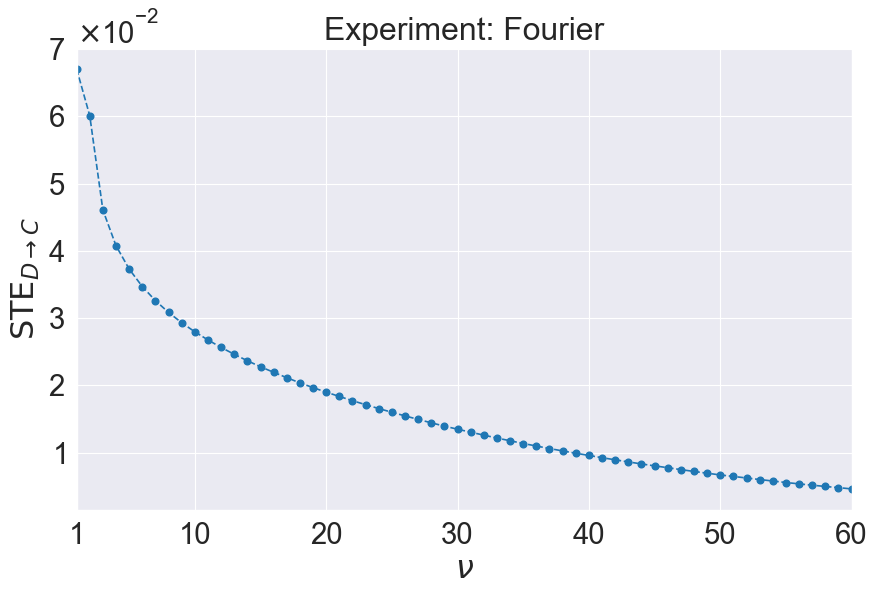

Experimento:  fourier
Diferencia:  ab-ba


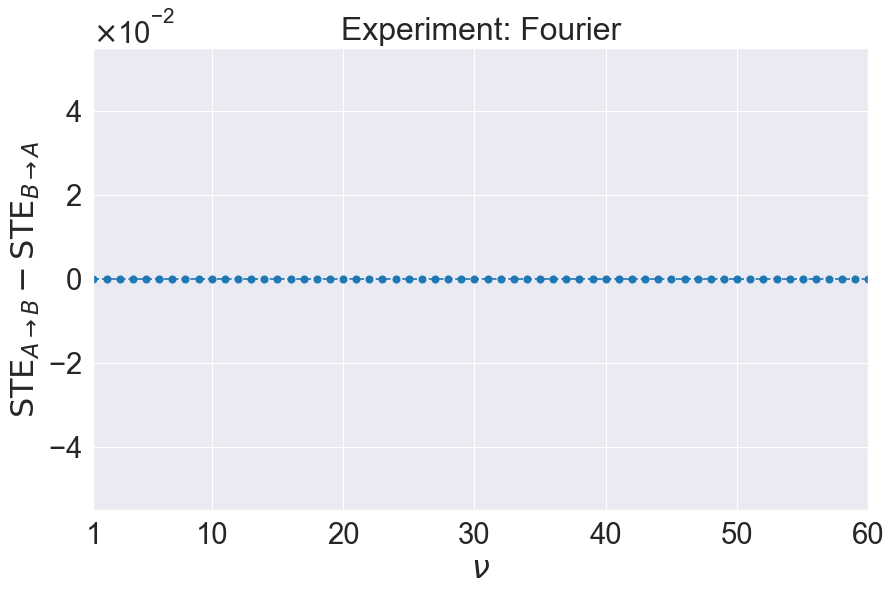

Experimento:  fourier
Diferencia:  ba-ab


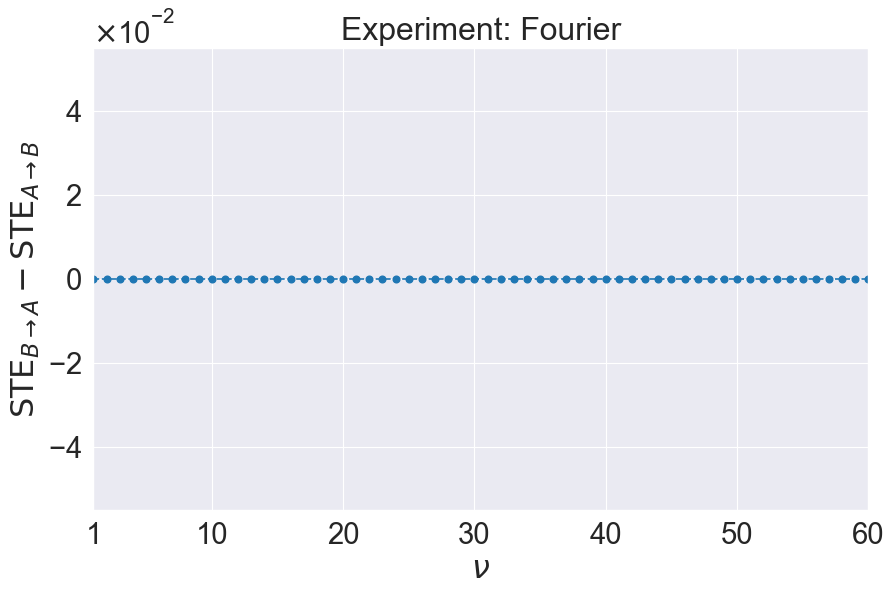

Experimento:  fourier
Diferencia:  cd-dc


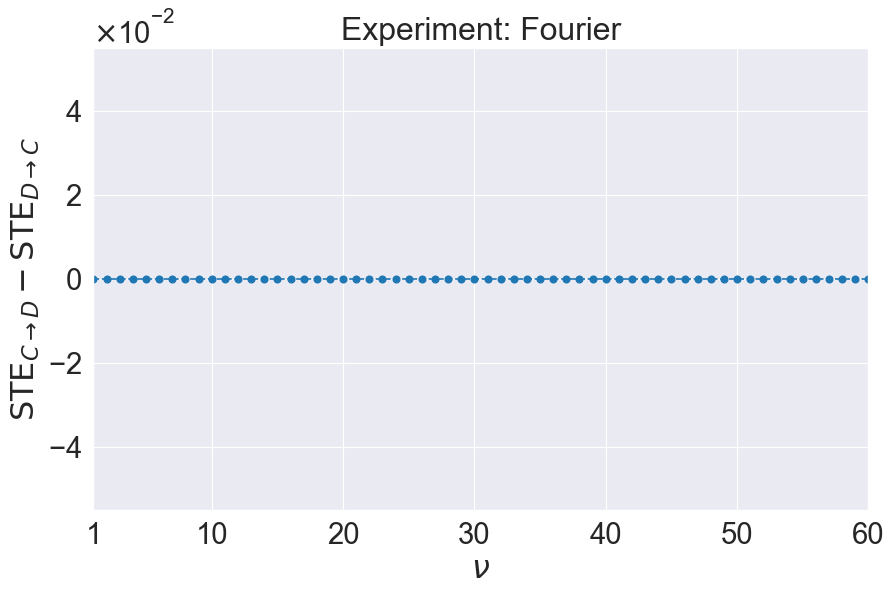

Experimento:  fourier
Diferencia:  dc-cd


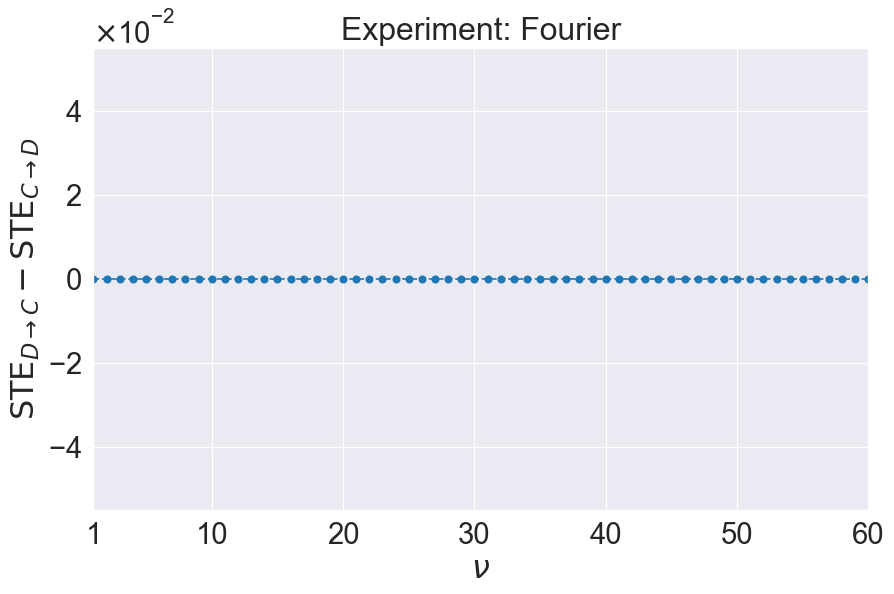

Experimento:  cattaneo
Sentido:  ab


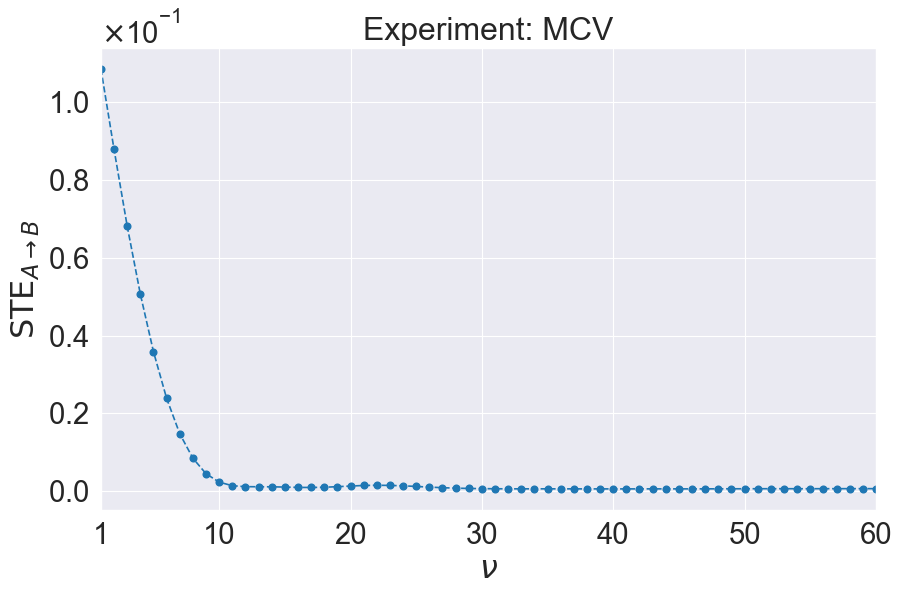

Experimento:  cattaneo
Sentido:  ba


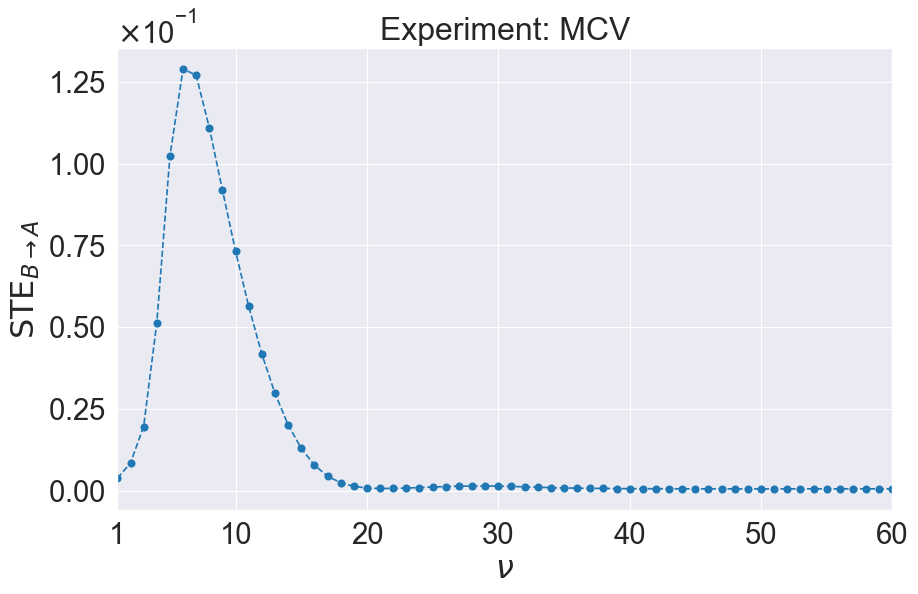

Experimento:  cattaneo
Sentido:  cd


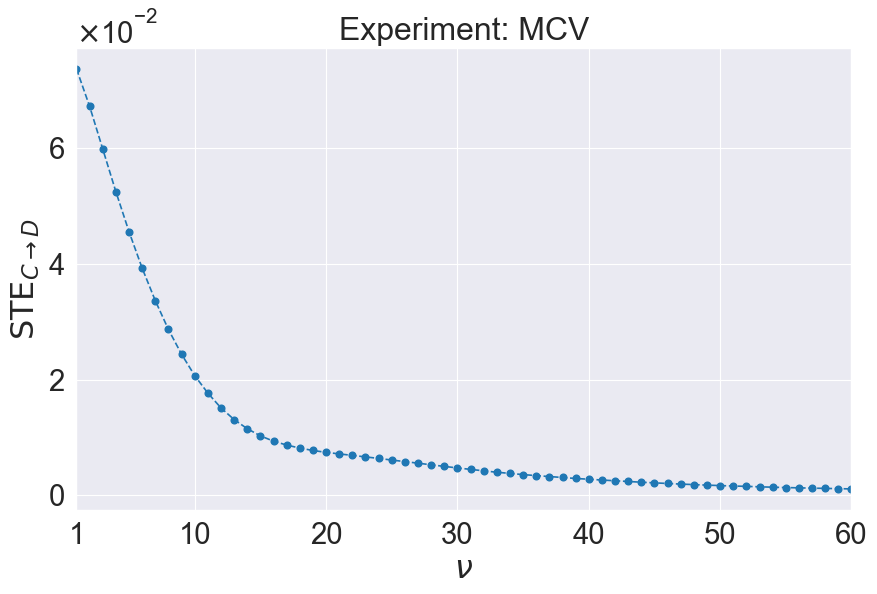

Experimento:  cattaneo
Sentido:  dc


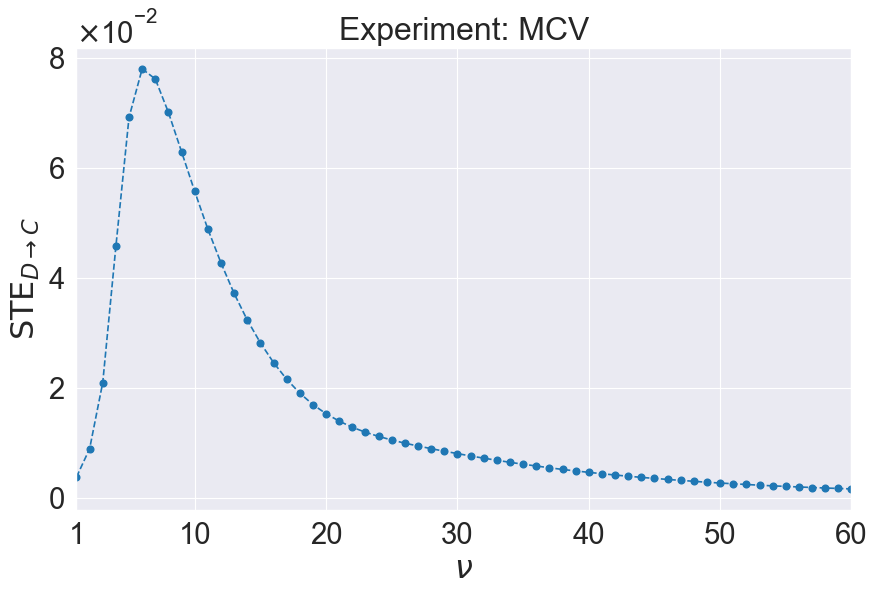

Experimento:  cattaneo
Diferencia:  ab-ba


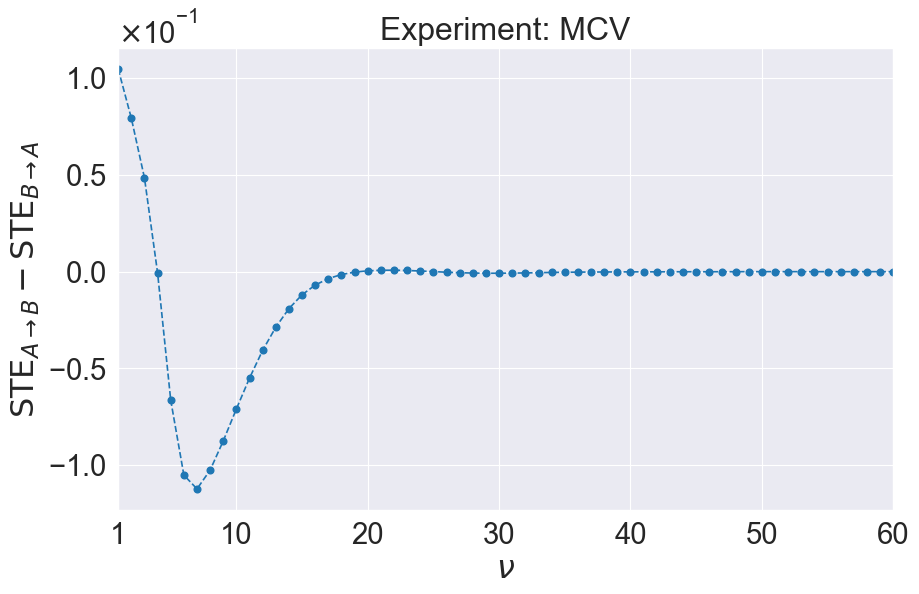

Experimento:  cattaneo
Diferencia:  ba-ab


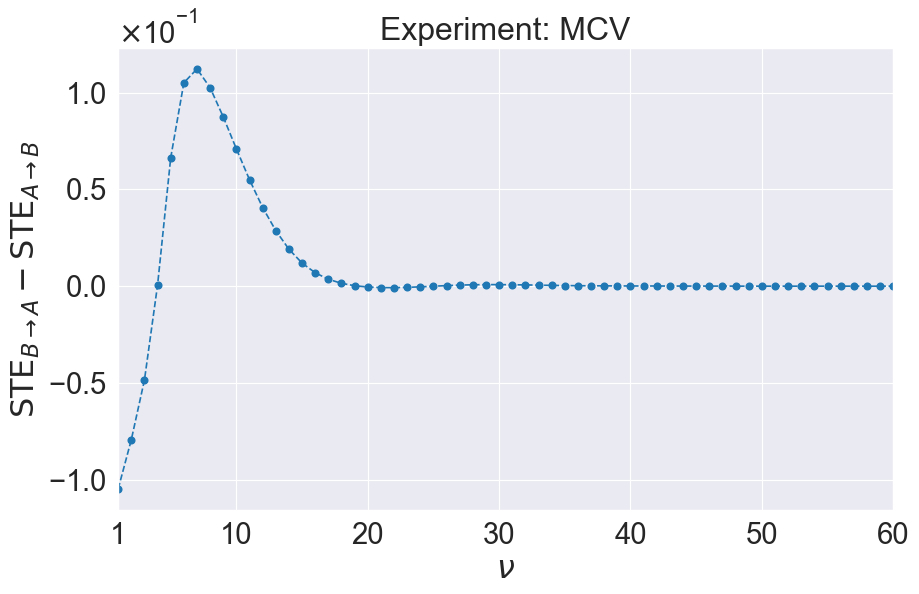

Experimento:  cattaneo
Diferencia:  cd-dc


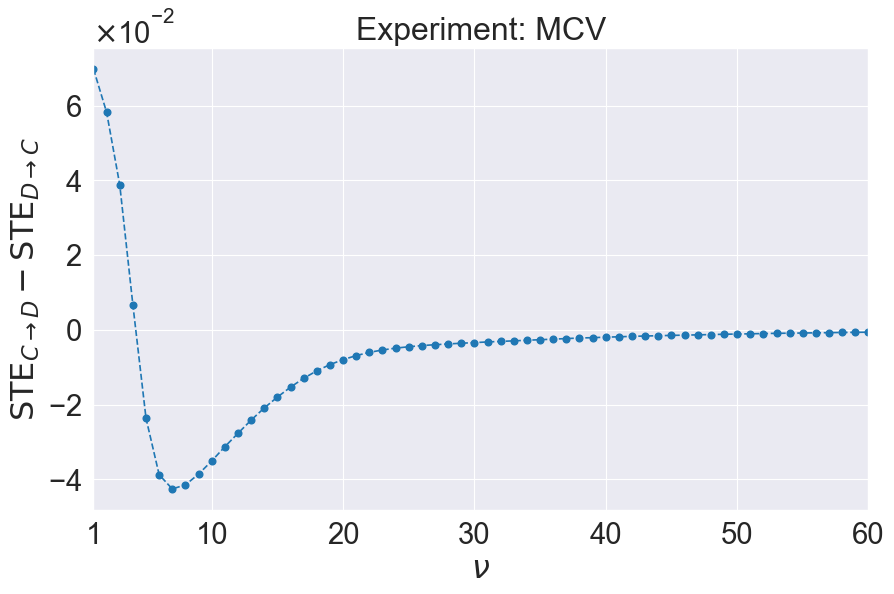

Experimento:  cattaneo
Diferencia:  dc-cd


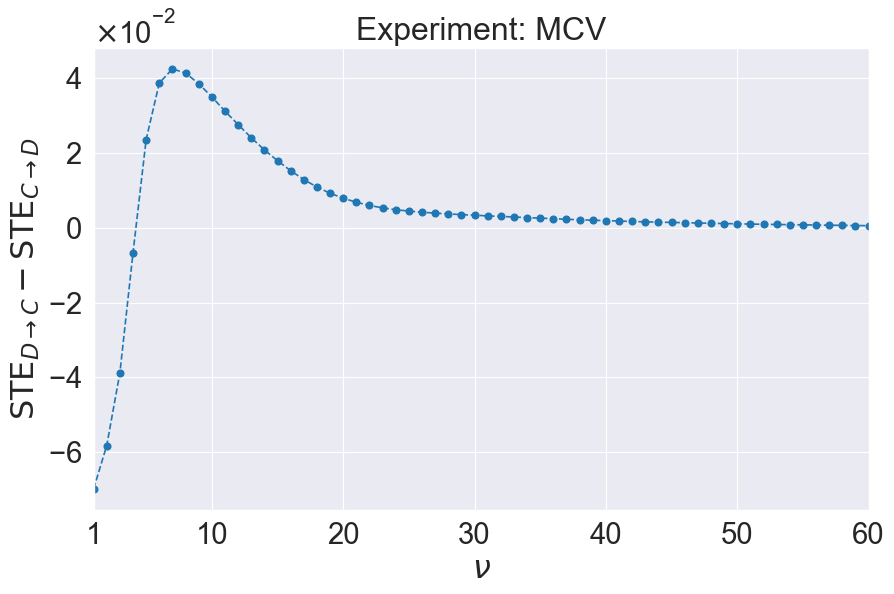

Experimento:  guyer
Sentido:  ab


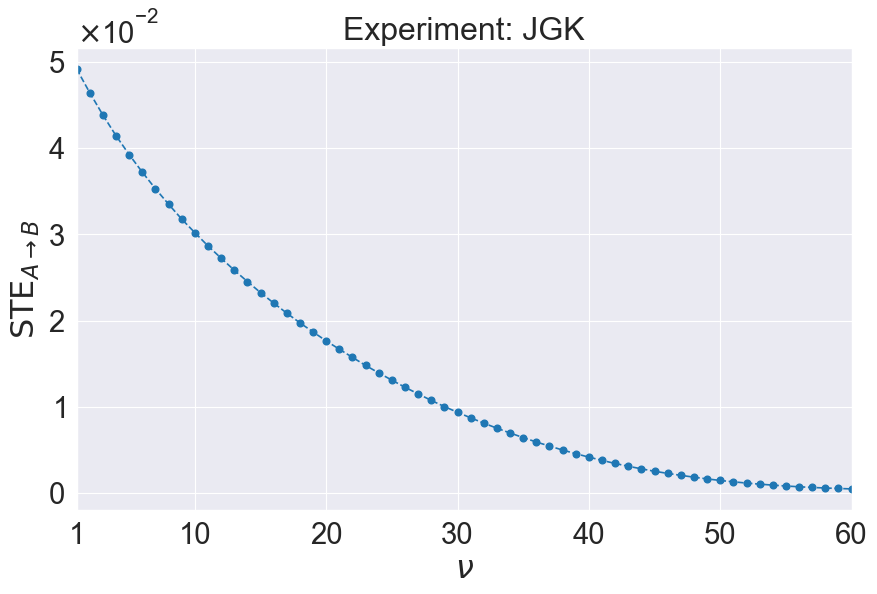

Experimento:  guyer
Sentido:  ba


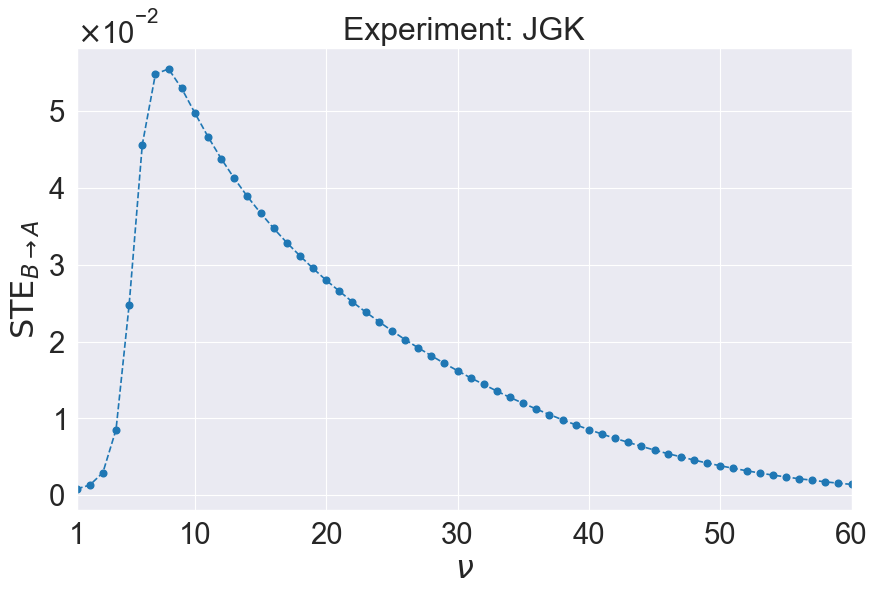

Experimento:  guyer
Sentido:  cd


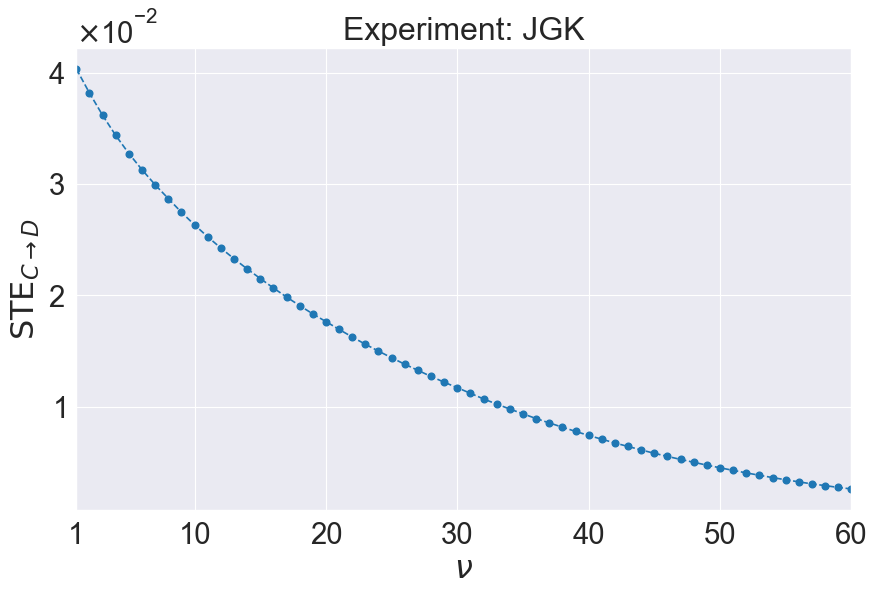

Experimento:  guyer
Sentido:  dc


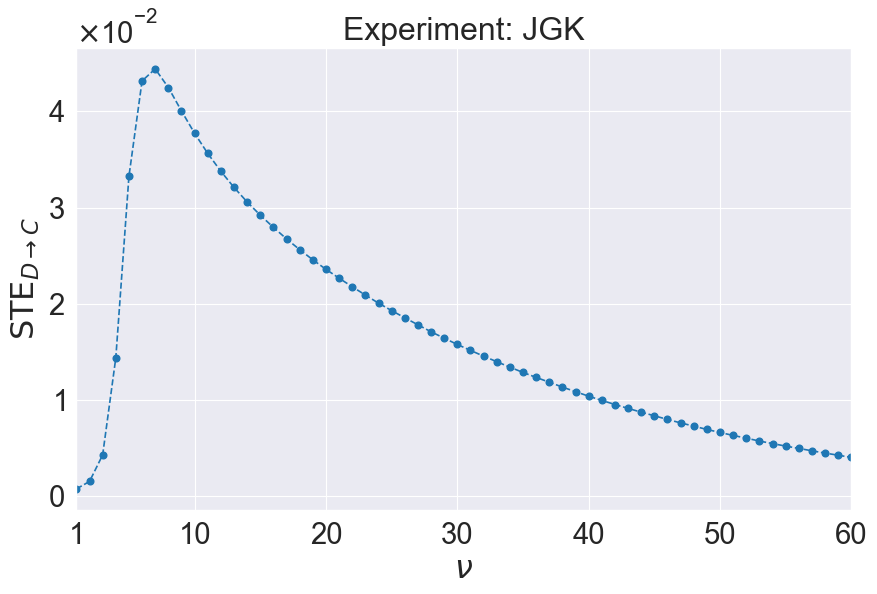

Experimento:  guyer
Diferencia:  ab-ba


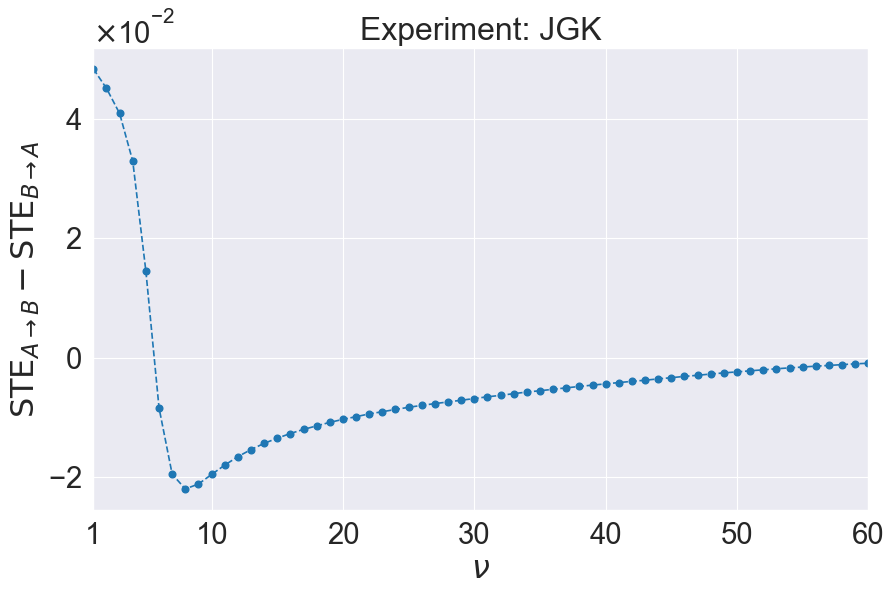

Experimento:  guyer
Diferencia:  ba-ab


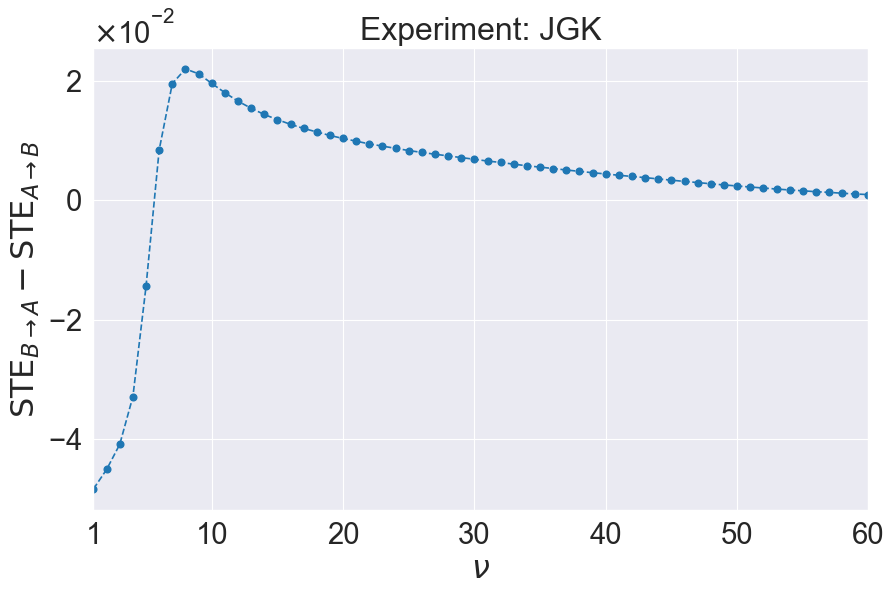

Experimento:  guyer
Diferencia:  cd-dc


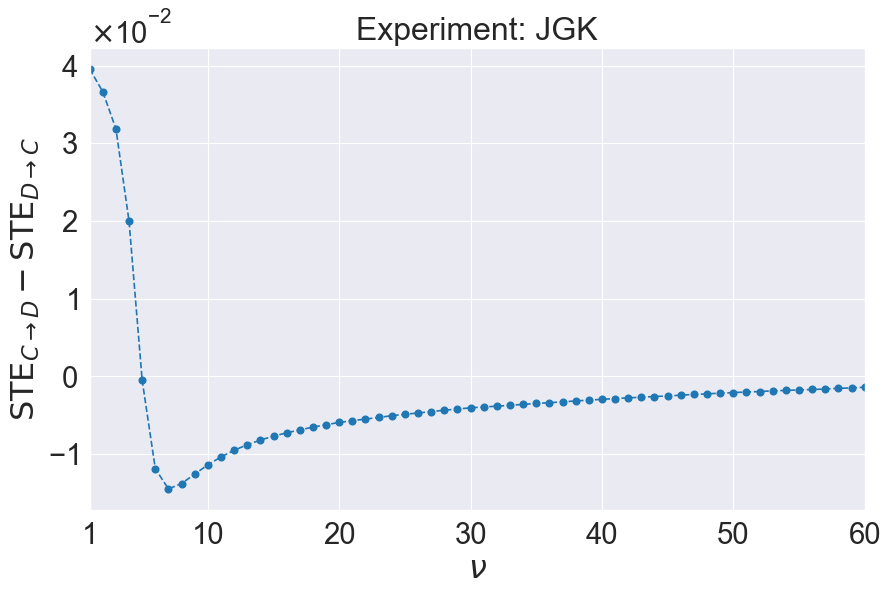

Experimento:  guyer
Diferencia:  dc-cd


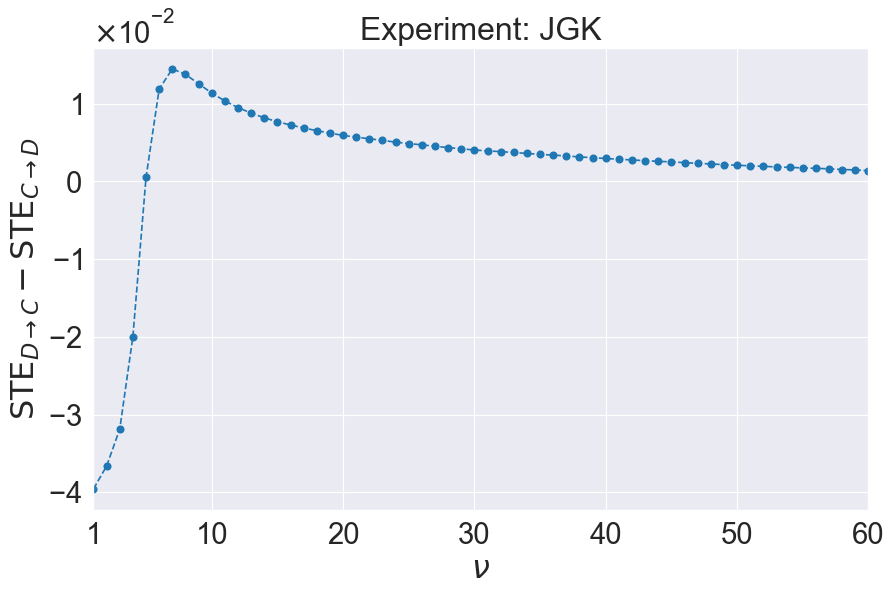

In [146]:
for exp in experimentos:
    for sen in sentidos:
        print("Experimento: ", exp)
        print("Sentido: ", sen)
        graficar_simple(exp, sen)
    for dif in diferencias:
        print("Experimento: ", exp)
        print("Diferencia: ", dif)
        graficar_diferencia(exp, dif)